In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
#bring in data
human_df = pd.read_csv("../Data/human-development-index.csv")
happiness = pd.read_csv("../Data/happiness-cantril-ladder.csv")

cancer_death = pd.read_csv("../Data/cancer-death-rates.csv")
cancer_incidence = pd.read_csv("../Data/cancer-incidence.csv")
dalys = pd.read_csv("../Data/dalys-rate-from-all-causes.csv")
life_exp = pd.read_csv("../Data/life-expectancy.csv")
mental_health = pd.read_csv("../Data/mental-health-share-of-total-disease-burden.csv")
air_pollution = pd.read_csv("../Data/death-rate-by-source-from-air-pollution.csv")
vac_prev_death = pd.read_csv("../Data/deaths-caused-by-vaccine-preventable-diseases.csv")
health_ins_cov = pd.read_csv("../Data/health-insurance-coverage-in-the-us.csv")
death_risk = pd.read_csv("../Data/number-of-deaths-by-risk-factor.csv")
suicide = pd.read_csv("../Data/suicide-death-rates.csv")
inf_disease = pd.read_csv("../Data/the-number-of-cases-of-infectious-diseases.csv")

# Clean and Transform Data
Filter for the Country (maybe the year as well)<br>
Sort values for readability <br>
Insert the 'start_value' column, to get the 'score' calculation <br>
The 'score' value represents change from the 'start_value'. Calculated by subtracting the current value from the 'start_value'.<br>
Reduce columns <br>

In [3]:
#filter and clean the hdi data
human_df_clean = human_df[(human_df['Code'] == 'USA')&(human_df['Year'] >= 2006)&(human_df['Year'] < 2018)]
human_df_clean = human_df_clean.sort_values(['Year'], ascending = (False))
human_df_clean.insert(4, 'start_value_human', 0.901)
human_df_clean['score_human'] = round((human_df_clean['Human Development Index (UNDP)'] / human_df_clean['start_value_human'])-1,4)
human_df_clean = human_df_clean[['Entity', 'Year','score_human']]

In [4]:
#filter and clean happiness data
happiness_clean = happiness[(happiness['Code'] == 'USA')&(happiness['Year'] >= 2006)&(happiness['Year'] < 2018)]
happiness_clean = happiness_clean.sort_values(['Year'], ascending = (False))
happiness_clean.insert(4, 'start_value_h', 7.181794)
happiness_clean['score_happy'] = round((happiness_clean['Life satisfaction in Cantril Ladder (World Happiness Report 2019)'] / happiness_clean['start_value_h'])-1,4)
happiness_clean = happiness_clean[['Entity', 'Year','score_happy']]

In [5]:
#filter and clean cancer death data
cancer_death_clean = cancer_death[(cancer_death['Code'] == 'USA')&(cancer_death['Year'] >= 2006)&(cancer_death['Year'] < 2018)]
cancer_death_clean = cancer_death_clean.sort_values(['Year'], ascending = (False))
cancer_death_clean.insert(4, 'start_value_cd', 139.857968)
cancer_death_clean['score_cd'] = round((cancer_death_clean['Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'] / cancer_death_clean['start_value_cd'])-1,4)
cancer_death_clean = cancer_death_clean[['Entity', 'Year','score_cd']]

In [6]:
#filter and clean cancer incidence data
cancer_incidence_clean = cancer_incidence[(cancer_incidence['Code'] == 'USA')&(cancer_incidence['Year'] >= 2006)&(cancer_incidence['Year'] < 2018)]
cancer_incidence_clean = cancer_incidence_clean.sort_values(['Year'], ascending = (False))
cancer_incidence_clean.insert(4, 'start_value_ci', 1279.477805)
cancer_incidence_clean['score_ci'] = round((cancer_incidence_clean['Incidence - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'] / cancer_incidence_clean['start_value_ci'])-1,4)
cancer_incidence_clean = cancer_incidence_clean[['Entity', 'Year','score_ci']]

In [7]:
#filter and clean dalys data
dalys_clean = dalys[(dalys['Code'] == 'USA')&(dalys['Year'] >= 2006)&(dalys['Year'] < 2018)]
dalys_clean = dalys_clean.sort_values(['Year'], ascending = (False))
dalys_clean.insert(4, 'start_value_d', 24784.593979)
dalys_clean['score_d'] = round((dalys_clean['DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate)'] / dalys_clean['start_value_d'])-1,4)
dalys_clean = dalys_clean[['Entity', 'Year','score_d']]

In [8]:
#filter and clean life exp data
life_exp_clean = life_exp[(life_exp['Code'] == 'USA')&(life_exp['Year'] >= 2006)&(life_exp['Year'] < 2018)]
life_exp_clean = life_exp_clean.sort_values(['Year'], ascending = (False))
life_exp_clean.insert(4, 'start_value_le', 77.892)
life_exp_clean['score_le'] = round((life_exp_clean['Life expectancy'] / life_exp_clean['start_value_le'])-1,4)
life_exp_clean = life_exp_clean[['Entity', 'Year','score_le']]

In [9]:
#filter and clean mental health data
mental_health_clean = mental_health[(mental_health['Code'] == 'USA')&(mental_health['Year'] >= 2006)&(mental_health['Year'] < 2018)]
mental_health_clean = mental_health_clean.sort_values(['Year'], ascending = (False))
mental_health_clean.insert(4, 'start_value_mh', 8.112356)
mental_health_clean['score_mh'] = round((mental_health_clean['DALYs (Disability-Adjusted Life Years) - Mental health disorders (Age-standardized percent)'] / mental_health_clean['start_value_mh'])-1,4)
mental_health_clean = mental_health_clean[['Entity', 'Year','score_mh']]

In [10]:
#filter and clean air pollution deaths
air_pollution_clean = air_pollution[(air_pollution['Code'] == 'USA')&(air_pollution['Year'] >= 2006)&(air_pollution['Year'] < 2018)]
air_pollution_clean = air_pollution_clean.sort_values(['Year'], ascending = (False))
air_pollution_clean['total'] = air_pollution_clean['Deaths - Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)'] + air_pollution_clean['Deaths - Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)'] + air_pollution_clean['Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)']
air_pollution_clean.insert(4, 'start_value_ap', 26.494357)
air_pollution_clean['score_ap'] = round((air_pollution_clean['total'] / air_pollution_clean['start_value_ap'])-1,4)
air_pollution_clean = air_pollution_clean[['Entity', 'Year','score_ap']]

In [11]:
#list to make totaling easier
vac_list = list(vac_prev_death)
vac_list.remove('Entity')
vac_list.remove('Code')
vac_list.remove('Year')
#filter and clean vaccine preventable deaths
vac_prev_death_clean = vac_prev_death[(vac_prev_death['Code'] == 'USA')&(vac_prev_death['Year'] >= 2006)&(vac_prev_death['Year'] < 2018)]
vac_prev_death_clean = vac_prev_death_clean.sort_values(['Year'], ascending = (False))
vac_prev_death_clean['total'] = vac_prev_death_clean[vac_list].sum(axis = 1)
vac_prev_death_clean.insert(4, 'start_value_vd', 2412.136572)
vac_prev_death_clean['score_vd'] = round((vac_prev_death_clean['total'] / vac_prev_death_clean['start_value_vd'])-1,4)
vac_prev_death_clean = vac_prev_death_clean[['Entity', 'Year','score_vd']]

In [12]:
#filter and clean health insurance coverage data
health_ins_cov_clean = health_ins_cov[(health_ins_cov['Code'] == 'USA')&(health_ins_cov['Year'] >= 2006)&(health_ins_cov['Year'] < 2018)]
health_ins_cov_clean = health_ins_cov_clean.sort_values(['Year'], ascending = (False))
health_ins_cov_clean.insert(4, 'start_value_hi', 84.2)
health_ins_cov_clean['score_hi'] = round((health_ins_cov_clean['Health Insurance Coverage US, Any Plan (US Current Population Survey (2014))'] / health_ins_cov_clean['start_value_hi'])-1,4)
health_ins_cov_clean = health_ins_cov_clean[['Entity', 'Year','score_hi']]

In [13]:
#filter and clean death by risk factor data - sanitiation
death_risk_san_clean = death_risk[(death_risk['Code'] == 'USA')&(death_risk['Year'] >= 2006)&(death_risk['Year'] < 2018)]
death_risk_san_clean = death_risk_san_clean.sort_values(['Year'], ascending = (False))
death_risk_san_clean.insert(4, 'start_value_s', 664.778667)
death_risk_san_clean['score_s'] = round((death_risk_san_clean['Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)'] / death_risk_san_clean['start_value_s'])-1,4)
death_risk_san_clean = death_risk_san_clean[['Entity', 'Year','score_s']]

In [14]:
#filter and clean death by risk factor data - water
death_risk_clean = death_risk[(death_risk['Code'] == 'USA')&(death_risk['Year'] >= 2006)&(death_risk['Year'] < 2018)]
death_risk_clean = death_risk_clean.sort_values(['Year'], ascending = (False))
death_risk_clean.insert(4, 'start_value_w', 399.898736)
death_risk_clean['score_w'] = round((death_risk_clean['Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)'] / death_risk_clean['start_value_w'])-1,4)
death_risk_clean = death_risk_clean[['Entity', 'Year','score_w']]

In [15]:
#filter and clean death by suicide
suicide_clean = suicide[(suicide['Code'] == 'USA')&(suicide['Year'] >= 2006)&(suicide['Year'] < 2018)]
suicide_clean = suicide_clean.sort_values(['Year'], ascending = (False))
suicide_clean.insert(4, 'start_value_su', 11.633350	)
suicide_clean['score_su'] = round((suicide_clean['Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)'] / suicide_clean['start_value_su'])-1,4)
suicide_clean = suicide_clean[['Entity', 'Year','score_su']]

In [16]:
#filter and clean death by HIV/AIDS
inf_disease_clean = inf_disease[(inf_disease['Code'] == 'USA')&(inf_disease['Year'] >= 2006)&(inf_disease['Year'] < 2018)]
inf_disease_clean = inf_disease_clean.sort_values(['Year'], ascending = (False))
inf_disease_clean.insert(4, 'start_value_hiv', 43422.086238)
inf_disease_clean['score_hiv'] = round((inf_disease_clean['Incidence - HIV/AIDS - Sex: Both - Age: All Ages (Number)'] / inf_disease_clean['start_value_hiv'])-1,4)
inf_disease_clean = inf_disease_clean[['Entity', 'Year','score_hiv']]

In [17]:
#filter and clean death by TB
inf_disease_t_clean = inf_disease[(inf_disease['Code'] == 'USA')&(inf_disease['Year'] >= 2006)&(inf_disease['Year'] < 2018)]
inf_disease_t_clean = inf_disease_t_clean.sort_values(['Year'], ascending = (False))
inf_disease_t_clean.insert(4, 'start_value_t', 11464.262352)
inf_disease_t_clean['score_t'] = round((inf_disease_t_clean['Incidence - Tuberculosis - Sex: Both - Age: All Ages (Number)'] / inf_disease_t_clean['start_value_t'])-1,4)
inf_disease_t_clean = inf_disease_t_clean[['Entity', 'Year','score_t']]

# Merge dfs
https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes

In [18]:
#merge dfs
data_frames = [human_df_clean,
               happiness_clean, 
               cancer_death_clean, 
               cancer_incidence_clean,
               dalys_clean, 
               life_exp_clean,
               mental_health_clean,
               air_pollution_clean,
               vac_prev_death_clean,
               health_ins_cov_clean,
               death_risk_san_clean,
               death_risk_clean,
               suicide_clean,
               inf_disease_clean,
               inf_disease_t_clean
              ]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Entity','Year'],how='outer'), data_frames)
df_merged = df_merged.sort_values(['Year'], ascending = (False))

# Find correlation factors and explore

In [19]:
df_corr = df_merged.corr()
df_corr = abs(df_corr)
df_corr

,Year,score_human,score_happy,score_cd,score_ci,score_d,score_le,score_mh,score_ap,score_vd,score_hi,score_s,score_w,score_su,score_hiv,score_t
Year,1.000000,0.955838,0.748408,0.908653,0.449748,0.414359,0.884081,0.915627,0.991168,0.687945,0.679975,0.856825,0.969206,0.933658,0.713067,0.998058
score_human,0.955838,1.000000,0.732699,0.924473,0.464843,0.564339,0.939745,0.764939,0.929742,0.809182,0.434552,0.696654,0.959297,0.848511,0.538453,0.960711
score_happy,0.748408,0.732699,1.000000,0.639856,0.203455,0.219777,0.631729,0.745861,0.740726,0.445677,0.018427,0.731289,0.771699,0.787649,0.562970,0.746560
score_cd,0.908653,0.924473,0.639856,1.000000,0.749244,0.738348,0.983328,0.764673,0.895518,0.901477,0.596027,0.635612,0.939797,0.713959,0.381380,0.898714
score_ci,0.449748,0.464843,0.203455,0.749244,1.000000,0.803317,0.689878,0.564190,0.452374,0.756211,0.751497,0.197916,0.502831,0.164393,0.103667,0.417973
score_d,0.414359,0.564339,0.219777,0.738348,0.803317,1.000000,0.786093,0.247728,0.386573,0.929915,0.343662,0.022046,0.552526,0.086656,0.330000,0.407935
score_le,0.884081,0.939745,0.631729,0.983328,0.689878,0.786093,1.000000,0.679826,0.860797,0.942695,0.482022,0.552789,0.931586,0.681686,0.303990,0.880964
score_mh,0.915627,0.764939,0.745861,0.764673,0.564190,0.247728,0.679826,1.000000,0.933567,0.485126,0.924281,0.947487,0.819292,0.968136,0.869488,0.906532
score_ap,0.991168,0.929742,0.740726,0.895518,0.452374,0.386573,0.860797,0.933567,1.000000,0.663470,0.731615,0.872052,0.958858,0.932863,0.726797,0.989353
score_vd,0.687945,0.809182,0.445677,0.901477,0.756211,0.929915,0.942695,0.485126,0.663470,1.000000,0.379642,0.256205,0.774871,0.425120,0.013241,0.689147


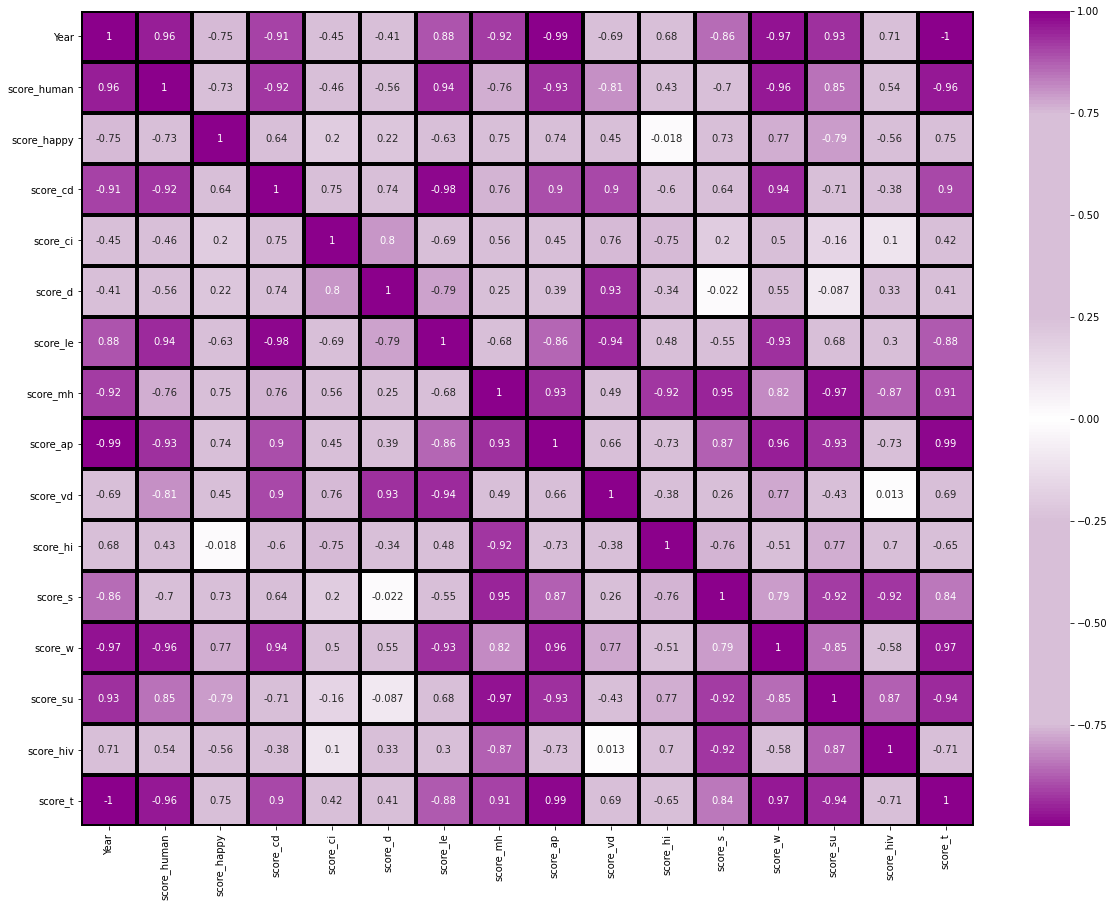

In [20]:
plt.figure(figsize = (20,15))

cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['darkmagenta','thistle','thistle','thistle','white','thistle','thistle','thistle','darkmagenta']
)
_=sns.heatmap(df_merged.corr(), annot=True,cmap=cmap,linewidths=3, linecolor='black')

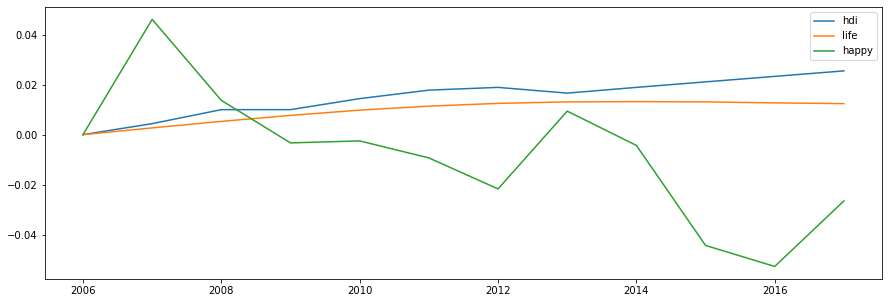

In [21]:
plt.figure(figsize = (15,5))
plt.plot(df_merged['Year'],df_merged['score_human'], label = 'hdi')
plt.plot(df_merged['Year'],df_merged['score_le'],label = 'life')
plt.plot(df_merged['Year'],df_merged['score_happy'],label = 'happy')
plt.legend()

In [22]:
df_merged

,Entity,Year,score_human,score_happy,score_cd,score_ci,score_d,score_le,score_mh,score_ap,score_vd,score_hi,score_s,score_w,score_su,score_hiv,score_t
0,United States,2017,0.0255,-0.0265,-0.0873,-0.0008,-0.0193,0.0124,NaN,-0.2725,-0.1922,NaN,-0.1323,-0.2579,0.1034,0.1806,-0.2940
1,United States,2016,0.0233,-0.0527,-0.0916,-0.0036,-0.0222,0.0127,-0.0460,-0.2732,-0.2140,NaN,-0.1215,-0.2474,0.1039,0.1157,-0.2639
2,United States,2015,0.0211,-0.0443,-0.1051,-0.0100,-0.0356,0.0131,-0.0379,-0.2285,-0.2495,NaN,-0.0835,-0.2212,0.0749,0.0594,-0.2348
3,United States,2014,0.0189,-0.0043,-0.1016,-0.0110,-0.0431,0.0132,-0.0275,-0.2162,-0.2614,0.0641,-0.0488,-0.2018,0.0481,0.0122,-0.2069
4,United States,2013,0.0166,0.0094,-0.0959,-0.0102,-0.0457,0.0131,-0.0191,-0.1772,-0.2604,0.0297,-0.0145,-0.1811,0.0349,-0.0272,-0.1803
5,United States,2012,0.0189,-0.0217,-0.0858,-0.0081,-0.0456,0.0125,-0.0106,-0.1501,-0.2631,0.0048,0.0158,-0.1656,0.0312,-0.0574,-0.1559
6,United States,2011,0.0178,-0.0093,-0.0725,-0.0052,-0.0421,0.0114,-0.0050,-0.0955,-0.2459,0.0012,0.0420,-0.1488,0.0270,-0.0782,-0.1343
7,United States,2010,0.0144,-0.0025,-0.0658,-0.0051,-0.0430,0.0098,-0.0012,-0.1125,-0.2342,-0.0059,0.0394,-0.1560,0.0098,-0.0900,-0.1153
8,United States,2009,0.0100,-0.0033,-0.0425,-0.0016,-0.0296,0.0077,0.0010,-0.0758,-0.1884,-0.0036,0.0704,-0.0863,0.0177,-0.0833,-0.0941
9,United States,2008,0.0100,0.0137,-0.0300,-0.0023,-0.0202,0.0053,0.0001,-0.0482,-0.1430,0.0048,0.0895,-0.0224,0.0113,-0.0587,-0.0658


# Transform the dataframe: <br>
    For all data, multiply by the correlation to hdi(score_human)
    If the data shows a decrease but is 'good' (decrease in deaths) reverse the sign.
    Same for 'bad' factors, make sure they are negative.

In [23]:
df_merged.columns

Index(['Entity', 'Year', 'score_human', 'score_happy', 'score_cd', 'score_ci',
       'score_d', 'score_le', 'score_mh', 'score_ap', 'score_vd', 'score_hi',
       'score_s', 'score_w', 'score_su', 'score_hiv', 'score_t'],
      dtype='object')

In [24]:
df_merged['score_cd'] = df_merged['score_cd'] *-1
df_merged['score_ci'] = df_merged['score_ci'] *-1
df_merged['score_d'] = df_merged['score_d'] *-1
df_merged['score_mh'] = df_merged['score_mh'] *-1
df_merged['score_ap'] = df_merged['score_ap'] *-1
df_merged['score_vd'] = df_merged['score_vd'] *-1
df_merged['score_s'] = df_merged['score_s'] *-1
df_merged['score_w'] = df_merged['score_w'] *-1
df_merged['score_su'] = df_merged['score_su'] *-1
df_merged['score_hiv'] = df_merged['score_hiv'] *-1
df_merged['score_t'] = df_merged['score_t'] *-1

In [25]:
#make dfs for storage
score_cd = []
score_ci = []
score_d = []
score_le = []
score_mh = []
score_ap = []
score_vd = []
score_hi = []
score_s = []
score_w = []
score_su = []
score_hiv = []
score_t = []
#organize dfs in a dictionary
names_dic = { 3 : score_cd, 
              4 : score_ci, 
              5 : score_d, 
              6 : score_le,
              7 : score_mh,
              8 : score_ap, 
              9 : score_vd, 
              10 : score_hi, 
              11 : score_s,
              12 : score_w,
              13 : score_su, 
              14 : score_hiv, 
              15 : score_t      
            }

#make variables for the loop
col_count = len(df_merged.columns)-4
col = 4
corr_col = 3
dic_ind = 3
columns_list = list(df_merged.columns)

In [26]:
for x in list(names_dic)[:]:  
    #will put the weight into the first dictionary
    for i in df_merged.iloc[:,col]:
        corr = df_corr.iloc[1][corr_col]
        num = i * corr * 100
        names_dic[dic_ind].append(num)
    col +=1
    corr_col += 1
    dic_ind += 1
names_dic

{3: [8.070652247328084,
  8.468175782992581,
  9.716214790311357,
  9.39264912174723,
  8.86569931865708,
  7.931981246514885,
  6.702431705971203,
  6.083034569005588,
  3.9290116897072567,
  2.773420016263946,
  1.7564993436338323,
  -0.0],
 4: [0.037187430149860076,
  0.1673434356743703,
  0.4648428768732509,
  0.5113271645605759,
  0.4741397344107159,
  0.3765227302673332,
  0.24171829597409042,
  0.23706986720535794,
  0.07437486029972015,
  0.1069138616808477,
  0.1069138616808477,
  -0.0],
 5: [1.0891743107924632,
  1.2528326269219006,
  2.009046915244129,
  2.432301181096122,
  2.5790293265914794,
  2.5733859363801197,
  2.3758672789825233,
  2.4266577908847617,
  1.6704435025625342,
  1.1399648226947021,
  0.6264163134609503,
  0.0],
 6: [1.1652834150459215,
  1.1934757557325164,
  1.2310655433146431,
  1.2404629902101747,
  1.2310655433146431,
  1.1746808619414533,
  1.0713089460906053,
  0.9209497957620993,
  0.7236034109559353,
  0.4980646854631762,
  0.2537310661793539,
  

ci = []
col = 5
corr_row = 4
while col <= col_count:
    for i in df_merged.iloc[:,col]:
        corr = df_corr.iloc[1][corr_row]
        num = i * corr 
        ci.append(num)
        col += 1
print(ci)

for i in df_merged.columns[4:]:
    while col <= col_count:
        for i in df_merged.iloc[:,col]:
            corr = df_corr.iloc[1][corr_row]
            num = i * corr 
            compiled.append(num)
            col += 1
    col = 5
    corr_row = 4
print(compiled)

In [27]:
#set back to df
second = pd.DataFrame(data = names_dic)
second.columns = ['weighted_cd','weighted_ci','weighted_d','weighted_le','weighted_mh','weighted_ap','weighted_vd','weighted_hi','weighted_s','weighted_w','weighted_su','weighted_hiv','weighted_t']
second['year'] = [2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006]
final = df_merged.merge(second, how = 'left', left_on ='Year', right_on = 'year')
final['total_weighted'] = final['weighted_cd'] + final['weighted_ci'] + final['weighted_d'] + final['weighted_le'] + final['weighted_ap'] + final['weighted_vd'] + final['weighted_s'] + final['weighted_w'] + final['weighted_su'] + final['weighted_hiv'] + final['weighted_t']
final

,Entity,Year,score_human,score_happy,score_cd,score_ci,score_d,score_le,score_mh,score_ap,score_vd,score_hi,score_s,score_w,score_su,score_hiv,score_t,weighted_cd,weighted_ci,weighted_d,weighted_le,weighted_mh,weighted_ap,weighted_vd,weighted_hi,weighted_s,weighted_w,weighted_su,weighted_hiv,weighted_t,year,total_weighted
0,United States,2017,0.0255,-0.0265,0.0873,0.0008,0.0193,0.0124,NaN,0.2725,0.1922,NaN,0.1323,0.2579,-0.1034,-0.1806,0.2940,8.070652,0.037187,1.089174,1.165283,NaN,25.335468,15.552470,NaN,9.216730,24.740275,-8.773601,-9.724454,28.244904,2017,94.954090
1,United States,2016,0.0233,-0.0527,0.0916,0.0036,0.0222,0.0127,0.0460,0.2732,0.2140,NaN,0.1215,0.2474,-0.1039,-0.1157,0.2639,8.468176,0.167343,1.252833,1.193476,3.518718,25.400550,17.316485,NaN,8.464344,23.733013,-8.816026,-6.229896,25.353164,2016,96.303461
2,United States,2015,0.0211,-0.0443,0.1051,0.0100,0.0356,0.0131,0.0379,0.2285,0.2495,NaN,0.0835,0.2212,-0.0749,-0.0594,0.2348,9.716215,0.464843,2.009047,1.231066,2.899118,21.244604,20.189080,NaN,5.817060,21.219654,-6.355345,-3.198408,22.557495,2015,94.895309
3,United States,2014,0.0189,-0.0043,0.1016,0.0110,0.0431,0.0132,0.0275,0.2162,0.2614,0.0641,0.0488,0.2018,-0.0481,-0.0122,0.2069,9.392649,0.511327,2.432301,1.240463,2.103581,20.101021,21.152006,2.785478,3.399671,19.358617,-4.081337,-0.656912,19.877111,2014,92.726918
4,United States,2013,0.0166,0.0094,0.0959,0.0102,0.0457,0.0131,0.0191,0.1772,0.2604,0.0297,0.0145,0.1811,-0.0349,0.0272,0.1803,8.865699,0.474140,2.579029,1.231066,1.461033,16.475028,21.071088,1.290619,1.010148,17.372872,-2.961302,1.464591,17.321620,2013,84.903978
5,United States,2012,0.0189,-0.0217,0.0858,0.0081,0.0456,0.0125,0.0106,0.1501,0.2631,0.0048,-0.0158,0.1656,-0.0312,0.0574,0.1559,7.931981,0.376523,2.573386,1.174681,0.810835,13.955427,21.289567,0.208585,-1.100713,15.885962,-2.647353,3.090718,14.977485,2012,77.507662
6,United States,2011,0.0178,-0.0093,0.0725,0.0052,0.0421,0.0114,0.0050,0.0955,0.2459,0.0012,-0.0420,0.1488,-0.0270,0.0782,0.1343,6.702432,0.241718,2.375867,1.071309,0.382469,8.879036,19.897775,0.052146,-2.925946,14.274342,-2.290979,4.210699,12.902349,2011,65.338602
7,United States,2010,0.0144,-0.0025,0.0658,0.0051,0.0430,0.0098,0.0012,0.1125,0.2342,-0.0059,-0.0394,0.1560,-0.0098,0.0900,0.1153,6.083035,0.237070,2.426658,0.920950,0.091793,10.459597,18.951032,-0.256386,-2.744816,14.965036,-0.831541,4.846073,11.076998,2010,66.390092
8,United States,2009,0.0100,-0.0033,0.0425,0.0016,0.0296,0.0077,-0.0010,0.0758,0.1884,-0.0036,-0.0704,0.0863,-0.0177,0.0833,0.0941,3.929012,0.074375,1.670444,0.723603,-0.076494,7.047444,15.244981,-0.156439,-4.904443,8.278735,-1.501864,4.485310,9.040291,2009,44.087887
9,United States,2008,0.0100,0.0137,0.0300,0.0023,0.0202,0.0053,-0.0001,0.0482,0.1430,0.0048,-0.0895,0.0224,-0.0113,0.0587,0.0658,2.773420,0.106914,1.139965,0.498065,-0.007649,4.481356,11.571296,0.208585,-6.235052,2.148826,-0.958817,3.160717,6.321478,2008,25.008168


In [28]:
new1 = pd.DataFrame(data = final.iloc[:,1])
new1['Factor'] = 'Decrease in Cancer Deaths'
new1['Total'] = final.iloc[:,-1]
new1['Score'] = final.iloc[:,17]

new2 = pd.DataFrame(data = final.iloc[:,1])
new2['Factor'] = 'Decrease in Cancer Incidences'
new2['Total'] = final.iloc[:,-1]
new2['Score'] = final.iloc[:,18]

new3 = pd.DataFrame(data = final.iloc[:,1])
new3['Factor'] = 'Decrease in Autism'
new3['Total'] = final.iloc[:,-1]
new3['Score'] = final.iloc[:,19]

new4 = pd.DataFrame(data = final.iloc[:,1])
new4['Factor'] = 'Life Expectancy'
new4['Total'] = final.iloc[:,-1]
new4['Score'] = final.iloc[:,20]

#skip mental health

new5 = pd.DataFrame(data = final.iloc[:,1])
new5['Factor'] = 'Decrease in Air Pollution'
new5['Total'] = final.iloc[:,-1]
new5['Score'] = final.iloc[:,22]

new6 = pd.DataFrame(data = final.iloc[:,1])
new6['Factor'] = 'Decrease in Vaccine Preventable Disease'
new6['Total'] = final.iloc[:,-1]
new6['Score'] = final.iloc[:,23]

#skip health insurance

new7 = pd.DataFrame(data = final.iloc[:,1])
new7['Factor'] = 'Decrease in Suicide'
new7['Total'] = final.iloc[:,-1]
new7['Score'] = final.iloc[:,25]

new8 = pd.DataFrame(data = final.iloc[:,1])
new8['Factor'] = 'Decrease in Death by Unsafe Drinking Water'
new8['Total'] = final.iloc[:,-1]
new8['Score'] = final.iloc[:,26]

new9 = pd.DataFrame(data = final.iloc[:,1])
new9['Factor'] = 'Decrease in Death by Unsanitary Conditions'
new9['Total'] = final.iloc[:,-1]
new9['Score'] = final.iloc[:,27]

new10 = pd.DataFrame(data = final.iloc[:,1])
new10['Factor'] = 'Decrease in HIV Incidences'
new10['Total'] = final.iloc[:,-1]
new10['Score'] = final.iloc[:,28]

new11 = pd.DataFrame(data = final.iloc[:,1])
new11['Factor'] = 'Decrease in TB Incidences'
new11['Total'] = final.iloc[:,-1]
new11['Score'] = final.iloc[:,29]

In [29]:
new_list = [new2, new3, new4, new5,new6, new7, new8, new5,new9, new10, new11]
all = new1.append(new_list, ignore_index = True)
all

,Year,Factor,Total,Score
0,2017,Decrease in Cancer Deaths,94.954090,8.070652
1,2016,Decrease in Cancer Deaths,96.303461,8.468176
2,2015,Decrease in Cancer Deaths,94.895309,9.716215
3,2014,Decrease in Cancer Deaths,92.726918,9.392649
4,2013,Decrease in Cancer Deaths,84.903978,8.865699
...,...,...,...,...
139,2010,Decrease in TB Incidences,66.390092,11.076998
140,2009,Decrease in TB Incidences,44.087887,9.040291
141,2008,Decrease in TB Incidences,25.008168,6.321478
142,2007,Decrease in TB Incidences,13.296709,3.256810


In [30]:
finalyr = final.set_index('Year').T
finalyr

Year,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
Entity,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
score_human,0.0255,0.0233,0.0211,0.0189,0.0166,0.0189,0.0178,0.0144,0.01,0.01,0.0044,0.0
score_happy,-0.0265,-0.0527,-0.0443,-0.0043,0.0094,-0.0217,-0.0093,-0.0025,-0.0033,0.0137,0.0461,-0.0
score_cd,0.0873,0.0916,0.1051,0.1016,0.0959,0.0858,0.0725,0.0658,0.0425,0.03,0.019,-0.0
score_ci,0.0008,0.0036,0.01,0.011,0.0102,0.0081,0.0052,0.0051,0.0016,0.0023,0.0023,-0.0
score_d,0.0193,0.0222,0.0356,0.0431,0.0457,0.0456,0.0421,0.043,0.0296,0.0202,0.0111,0.0
score_le,0.0124,0.0127,0.0131,0.0132,0.0131,0.0125,0.0114,0.0098,0.0077,0.0053,0.0027,0.0
score_mh,NaN,0.046,0.0379,0.0275,0.0191,0.0106,0.005,0.0012,-0.001,-0.0001,-0.0003,-0.0
score_ap,0.2725,0.2732,0.2285,0.2162,0.1772,0.1501,0.0955,0.1125,0.0758,0.0482,0.0309,0.0
score_vd,0.1922,0.214,0.2495,0.2614,0.2604,0.2631,0.2459,0.2342,0.1884,0.143,0.0914,-0.0


In [31]:
final.to_csv('by_factor.csv')
finalyr.to_csv('by_yr.csv')
all.to_csv('all.csv')
